In [ ]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:01, 108MB/s] 


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
#Other data including normal, other viral infections and bacterial infections
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#covid-19 chest X-ray data
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 3569 (delta 35), reused 28 (delta 11), pack-reused 3499
Receiving objects: 100% (3569/3569), 710.16 MiB | 39.30 MiB/s, done.
Resolving deltas: 100% (1426/1426), done.
Checking out files: 100% (1105/1105), done.


In [ ]:
import os
import glob
import pandas as pd
import csv
import re
import numpy as np
df_covid=pd.read_csv('/content/covid-chestxray-dataset/metadata.csv')

In [ ]:
covid_files_XRay=[]
clinical_notes=[]
for i in range(len(df_covid)):
  if ('COVID-19' in df_covid['finding'].iloc[i]) and ('X-ray' in df_covid['modality'].iloc[i]):
    covid_files_XRay.append(df_covid.iloc[i])
    

In [ ]:
df_covid['sex']

In [ ]:
F=[]
M=[]
sex=[]
age=[]
for i in range(len(df_covid)):
  if ('COVID-19' in df_covid['finding'].iloc[i]):
    sex.append(df_covid['sex'].iloc[i])
    age.append(df_covid['age'].iloc[i])
    


In [ ]:
age=np.array(age)

In [ ]:
import numpy as np, scipy.stats as st
import pandas as pd
a= age[~pd.isnull(age)]
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(55.09249345885294, 58.18955782319834)

In [ ]:
import statsmodels.stats.api as sms

sms.DescrStatsW(a).tconfint_mean()

(-2.50785196657475e+18, -1.8576586416163e+18)

In [ ]:
np.mean(a)

56.64102564102564

In [ ]:
sex.count('M')

326

In [ ]:
sex.count('F')

174

In [ ]:
covid_files_XRay=[]
clinical_notes=[]
for i in range(len(df_covid)):
  if ('COVID-19' in df_covid['finding'].iloc[i]) and ('X-ray' in df_covid['modality'].iloc[i]):
    covid_files_XRay.append(df_covid['filename'].iloc[i])
    clinical_notes.append(df_covid['clinical_notes'].iloc[i])
    covidXRay_df=pd.DataFrame(({'covid_files':covid_files_XRay, 'clinical_notes':clinical_notes}))

In [ ]:
df_covid

In [ ]:
Augmented=glob.glob("/content/drive/My Drive/covid-19/Data/covi-augmented/*")

In [ ]:
len(Augmented)

6839

In [ ]:
covid_files_XRay=[]
clinical_notes=[]
for i in range(len(df_covid)):
  if ('COVID-19' in df_covid['finding'].iloc[i]) and ('X-ray' in df_covid['modality'].iloc[i]):
    covid_files_XRay.append(df_covid['filename'].iloc[i])
    clinical_notes.append(df_covid['clinical_notes'].iloc[i])
covidXRay_df=pd.DataFrame(({'covid_files':covid_files_XRay, 'clinical_notes':clinical_notes}))

In [ ]:
covid_files_CT=[]
clinical_notes_CT=[]
for i in range(len(df_covid)):
  if ('COVID-19' in df_covid['finding'].iloc[i]) and ('CT' in df_covid['modality'].iloc[i]):
    covid_files_CT.append(df_covid['filename'].iloc[i])
    clinical_notes_CT.append(df_covid['clinical_notes'].iloc[i])
covidCT_df=pd.DataFrame(({'covid_files':covid_files_CT, 'clinical_notes':clinical_notes_CT}))

In [ ]:
len(covid_files_CT)

80

In [ ]:
covidXRay_images=[]
clinicalXRay_notes=[]
for i in glob.glob('/content/covid-chestxray-dataset/images/*'):
  for j in range(len(covidXRay_df)):
    if os.path.basename(i)==covidXRay_df['covid_files'].iloc[j]:
      covidXRay_images.append(i)
      clinicalXRay_notes.append(covidXRay_df['clinical_notes'].iloc[j])
  #if os.path.basename(i) in covid_df['covid_files']:
    #covid_images.append(i)



In [ ]:
covidCT_images=[]
clinicalCT_notes=[]
for i in glob.glob('/content/covid-chestxray-dataset/images/*'):
  for j in range(len(covidCT_df)):
    if os.path.basename(i)==covidCT_df['covid_files'].iloc[j]:
      covidCT_images.append(i)
      clinicalCT_notes.append(covidCT_df['clinical_notes'].iloc[j])
  #if os.path.basename(i) in covid_df['covid_files']:
    #covid_images.append(i)



In [ ]:
covid_dataframe=pd.DataFrame(({'covid_images':covidXRay_images, 'clinical_notes':clinicalXRay_notes}))
covid_dataframe.to_csv('/content/drive/My Drive/covid-19/covidXRay_images_clinical_notes.csv')

In [ ]:
len(covidXRay_images)

475

In [ ]:
covid_dataframe['covid_images'][2]

'/content/covid-chestxray-dataset/images/covid-19-pneumonia-12.jpg'

In [ ]:
glob.glob('/content/covid-chestxray-dataset/images/*')[0]

'/content/covid-chestxray-dataset/images/kjr-21-e24-g002-l-b.jpg'

In [ ]:
len(covid_images)

269

In [ ]:
import os
import glob
import pandas as pd
import csv
import re
import numpy as np

Covid=glob.glob('/content/covid-chestxray-dataset/images/*')

In [ ]:
len(Covid)

857

In [ ]:
!unzip '/content/drive/My Drive/covid-19/chest-xray-pneumonia.zip'

In [ ]:
!unzip Covid_Data_GradientCrescent.zip

In [ ]:
import os
import glob
import pandas as pd
import csv
import re
import numpy as np


#path_covid="/content/covid-chestxray-dataset/images/"
#file_covid=glob.glob(path_covid+"*")

path_other1_1="/content/chest_xray/val/NORMAL/"
file_other1_1=glob.glob(path_other1_1+"*")

path_other1_2="/content/chest_xray/val/PNEUMONIA/"
file_other1_2=glob.glob(path_other1_2+"*")

path_other2_1="/content/chest_xray/train/NORMAL/"
file_other2_1=glob.glob(path_other2_1+"*")

path_other2_2="/content/chest_xray/train/PNEUMONIA/"
file_other2_2=glob.glob(path_other2_2+"*")

path_other3_1="/content/chest_xray/test/NORMAL/"
file_other3_1=glob.glob(path_other3_1+"*")

path_other3_2="/content/chest_xray/test/PNEUMONIA/"
file_other3_2=glob.glob(path_other3_2+"*")


In [ ]:
Normal=glob.glob("/content/drive/My Drive/covid-19/Data/Normal/*")

In [ ]:
Other_Pneumonia=glob.glob("/content/drive/My Drive/covid-19/Data/Other_PNEUMONIA/*")

In [ ]:
Total=Normal+Other_Pneumonia

In [ ]:
len(Normal)

1583

In [ ]:
import shutil
for f in file_covid[:130]:
  shutil.move(f, "/content/New/train/covid")

In [ ]:
for f in file_covid[130:]:
  shutil.move(f, "/content/New/test/covid")

In [ ]:
for f in file_other2_2[130:162]:
  shutil.move(f, "/content/New/test/other")

In [ ]:
for f in file_other2_2[:130]:
  shutil.move(f, "/content/New/train/other")

In [ ]:
!cp file_covid "/content/New/train/covid/"

cp: cannot stat 'file_covid': No such file or directory


In [ ]:
len(file_covid)

162

In [ ]:
file_other=file_other1_1+file_other1_2+file_other2_1+file_other2_2+file_other3_1+file_other3_2

In [ ]:
file_other_pheumonia=file_other1_2+file_other2_2+file_other3_2

In [ ]:
len(file_other)

0

In [ ]:
train=file_covid[:130]+file_other_pheumonia[:130]

In [ ]:
#Binary

import numpy as np
import tensorflow as tf
DATASET_PATH = '/content/New/train'
test_dir = '/content/New/test'
IMAGE_SIZE = (150, 150)
#NUM_CLASSES = len(data_list)
NUM_CLASSES=2
BATCH_SIZE = 10 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 20
LEARNING_RATE =0.0005 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode='constant')
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="binary",
 
 )
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="binary",
 
 
 )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 208 images belonging to 3 classes.
Found 52 images belonging to 3 classes.


In [ ]:
!pip install keras --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(150, 150, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 
 optimizer=optimizers.Adam(lr=LEARNING_RATE),
 metrics=['acc'])

In [ ]:
print(model.summary())

In [ ]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches,
 steps_per_epoch =STEP_SIZE_TRAIN,
 validation_data = valid_batches,
 validation_steps = STEP_SIZE_VALID,
 epochs= NUM_EPOCHS,
 )

In [ ]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
 acc = result.history['acc']
 loss = result.history['loss']
 val_acc = result.history['val_acc']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(result, 20)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
 test_dir,target_size=IMAGE_SIZE,
 batch_size=1,
 shuffle=False,
 seed=42,
 
 
 class_mode="categorical")
eval_generator.reset()
x = model.evaluate_generator(eval_generator,
 steps = np.ceil(len(eval_generator) / BATCH_SIZE),
 use_multiprocessing = False,
 verbose = 1,
 workers=1
 )
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

In [ ]:
#getting features from VGG16 for splitting the image


import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet',include_top=False,
 input_shape=(150, 150, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

def get_features(img_path):
    img = image.load_img(img_path, target_size=(150, 150, 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = model.predict(x)
    return list(flatten[0])

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(160, 160, 3))
model.summary()

img_path =glob.glob("/content/drive/My Drive/covid-19/COVID-CT/COVID/*")
img = image.load_img(img_path[0], target_size=(128, 160))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

#print (vgg16_feature.shape)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 128, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 40, 128)       0     

In [ ]:
vgg16_feature.shape

(1, 4, 5, 512)

In [ ]:
filenames=glob.glob("/content/drive/My Drive/covid-19/Data/covid/*")

In [ ]:
len(filenames)

6839

In [ ]:
keyword='aug'
i=0
for f in filenames:
  i=i+1
  if keyword not in f:
        print(f)
        print(i)
        

In [ ]:
i=0
for f in filenames:
  if i<60:
    print(f)
    i=i+1

In [ ]:
filenames=glob.glob("/content/drive/My Drive/covid-19/Data/covid/*")

In [ ]:
os.remove('/content/drive/My Drive/covid-19/vgg16_feature_list_np_COVID_269.npz')

In [ ]:
len(covidCT_images)

59

In [ ]:
import os
import sys
import pickle
from glob import iglob
import glob
import re
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(160,160, 3))
model.summary()

vgg16_feature_list_Normal=[]
vgg16_feature_list_covid = []
vgg16_feature_list_Total = []
#img_path="/content/drive/My Drive/covid-19/Data/Covid-19/*"

#filenames=glob.glob("/content/drive/My Drive/covid-19/Data/Normal/*")
#filenames=Total
#filenames=covidCT_images
#filenames=glob.glob("/content/drive/My Drive/covid-19/COVID-19 Radiography Database/COVID-19/*")
#filenames=glob.glob("/content/drive/My Drive/covid-19/COVID-19 Radiography Database/Viral Pneumonia/*")
filenames=glob.glob('/content/drive/My Drive/covid-19/COVID-19 Radiography Database/NORMAL/*')
for i, fname in enumerate(filenames):
        # process the files under the directory 'dogs' or 'cats'
        # ...
        
        img = image.load_img(fname, target_size=(160, 160))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list_covid.append(vgg16_feature_np)
        
vgg16_feature_list_np_COVID = np.array(vgg16_feature_list_covid)
np.savez('/content/drive/My Drive/covid-19/COVID-19 Radiography Database/vgg16_feature_list_np_Normal_Kaggle.npz',covid=vgg16_feature_list_np_COVID)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [ ]:
# New data CT
import os
import sys
import pickle
from glob import iglob
import glob
import re
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(160,160, 3))
model.summary()

vgg16_feature_list_CT_COVID=[]
vgg16_feature_list_CT_non_COVID = []
#vgg16_feature_list_Total = []
#img_path="/content/drive/My Drive/covid-19/Data/Covid-19/*"


filenames=glob.glob("/content/drive/My Drive/covid-19/Small_CT_COVID/CT_COVID/*")
#filenames=Total
#filenames=covid_images
#filenames=glob.glob("/content/drive/My Drive/covid-19/Data/covid/*")
#filenames=glob.glob("/content/drive/My Drive/covid-19/Data/Other_PNEUMONIA/*")[:60]
#filenames=glob.glob('/content/covid-chestxray-dataset/images/*')
for i, fname in enumerate(filenames):
        # process the files under the directory 'dogs' or 'cats'
        # ...
        
        img = image.load_img(fname, target_size=(160, 160))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list_CT_COVID.append(vgg16_feature_np)
        
vgg16_feature_list_np_COVID = np.array(vgg16_feature_list_CT_COVID)
np.savez('/content/drive/My Drive/covid-19/Small_CT_COVID/vgg16_feature_list_np_COVID.npz',Normal=vgg16_feature_list_np_COVID)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [ ]:
import os
import sys
import pickle
from glob import iglob
import glob
import re
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np


imag_data_Normal=[]
imag_data_Covid=[]
imag_data_Other=[]

#filenames=glob.glob("/content/drive/My Drive/covid-19/Data/Normal/*")
#filenames=Total
#filenames=covid_images
filenames=glob.glob("/content/drive/My Drive/covid-19/Data/covid/*")
#filenames=glob.glob("/content/drive/My Drive/covid-19/Data/Other_PNEUMONIA/*")[:60]
#filenames=glob.glob('/content/covid-chestxray-dataset/images/*')
for i, fname in enumerate(filenames):
        # process the files under the directory 'dogs' or 'cats'
        # ...
        
        img = image.load_img(fname, target_size=(160, 160))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        imag_data_Normal.append(img_data)
        imag_data_Normal_Final=np.array(imag_data_Normal)
        #vgg16_feature = model.predict(img_data)
        #vgg16_feature_np = np.array(vgg16_feature)
        #vgg16_feature_list_Normal.append(vgg16_feature_np)
        
#vgg16_feature_list_np_COVID = np.array(vgg16_feature_list_Normal)
#np.savez('/content/drive/My Drive/covid-19/vgg16_feature_list_np_Normal.npz',Normal=vgg16_feature_list_np_COVID)

In [ ]:
imag_data_Normal_Final.shape

(31, 1, 160, 160, 3)

In [ ]:
np.savez('/content/drive/My Drive/covid-19/vgg16_feature_list_np_Normal.npz',Normal=vgg16_feature_list_np_COVID)

In [ ]:
np.savez('/content/drive/My Drive/covid-19/vgg16_feature_list_np_covid_size_227.npz',covid=vgg16_feature_list_np_covid)

In [ ]:
vgg16_feature_list_np_other = np.array(vgg16_feature_list_other)

In [ ]:
vgg16_feature_list_np_covid[0]

In [ ]:
filenames=glob.glob("/content/drive/My Drive/covid-19/Data/covid/*")

In [ ]:
len(filenames)

6839

In [ ]:
filenames[61]

In [ ]:
filenames=glob.glob('/content/covid-chestxray-dataset/images/*')

In [ ]:
filenames

In [ ]:
np.savez('/content/drive/My Drive/covid-19/vgg16_feature_list_np_other_224_correct.npz',covid=vgg16_feature_list_np_other)

In [ ]:
import os
import sys
import pickle
from glob import iglob
import glob
import re
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

fname='/content/drive/My Drive/covid-19/Data/Covid-19/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg'

model = VGG16(weights='imagenet', include_top=False,input_shape=(160, 160, 3))

img = image.load_img(fname, target_size=(160, 160))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)
vgg16_feature_np = np.array(vgg16_feature)
#vgg16_feature_list.append(vgg16_feature_np.flatten())

In [ ]:
vgg16_feature.shape

(1, 5, 5, 512)

In [ ]:
square=8
for fmap in vgg16_feature:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		plt.figure(figsize=(64,64))
		for _ in range(square):
           

			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			
			# plot filter channel in grayscale
			plt.imshow(fmap[:, :, ix-1], cmap='viridis')
			ix += 1
	# show the figure

        
	plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

model = VGG16(weights='imagenet', include_top=False,input_shape=(160, 160, 3))
#model.summary()


# load the model
#model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [18]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
# convert the image to an array
img = load_img(Covid[2], target_size=(160, 160))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		plt.figure(figsize=(64,64))
		for _ in range(square):
           

			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			
			# plot filter channel in grayscale
			plt.imshow(fmap[ :, :, ix-1], cmap='viridis')
			ix += 1
	# show the figure

        
	plt.show()

In [ ]:
np.array(feature_maps).shape

(1, 20, 20, 512)

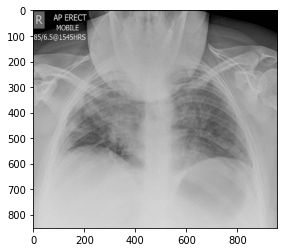

In [ ]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import csv
import re
import numpy as np

Covid=glob.glob('/content/drive/My Drive/covid-19/Data/Covid-19/*')
other=glob.glob('/content/drive/My Drive/covid-19/Data/Other_PNEUMONIA/*')

#img_path = '/content/drive/My Drive/covid-19/Data/Covid-19/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'
#image_path = test_dir + "/" +eval_generator.filenames[index]
image = mpimg.imread(covid_images[6])
#BGR TO RGB conversion using CV2
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)

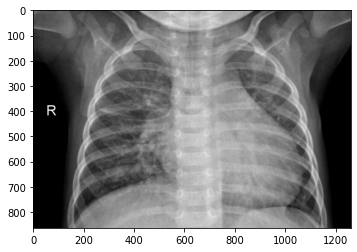

In [ ]:
other=glob.glob('/content/drive/My Drive/covid-19/Data/Other_PNEUMONIA/*')

#img_path = '/content/drive/My Drive/covid-19/Data/Covid-19/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'
#image_path = test_dir + "/" +eval_generator.filenames[index]
image = mpimg.imread(other[8])
#BGR TO RGB conversion using CV2
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)

In [ ]:
Covid[2]

'/content/drive/My Drive/covid-19/Data/Covid-19/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg'

In [ ]:
covid_images[0]

'/content/covid-chestxray-dataset/images/kjr-21-e24-g002-l-b.jpg'

In [ ]:
covid_images[0]

'/content/covid-chestxray-dataset/images/kjr-21-e24-g002-l-b.jpg'

In [ ]:
from keras.preprocessing import image
img = image.load_img(covid_images[6], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/250, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
print(clinical_notes[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


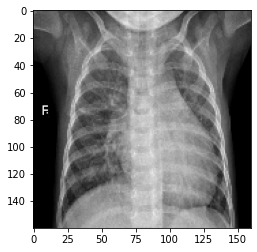

In [ ]:
from keras.preprocessing import image
img = image.load_img(other[8], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/250, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)

In [ ]:
vgg16_feature_list_np_covid.shape

(253, 1, 7, 7, 512)

In [ ]:
import numpy as np
X_Covid=np.load('/content/drive/My Drive/covid-19/vgg16_feature_list_np_COVID_XRay_475.npz')
X_Covid_Augmented=np.load('/content/drive/My Drive/covid-19/vgg16_feature_list_np_covid_augmented.npz')
#X_Covid=vgg16_feature_list_np_COVID
#X_Other_Pneumonia=vgg16_feature_list_np_other
X_Other_Pneumonia=np.load('/content/drive/My Drive/covid-19/vgg16_feature_list_np_other2.npz')
X_Other=np.load('/content/drive/My Drive/covid-19/vgg16_feature_list_np_Total.npz')
X_Normal=np.load('/content/drive/My Drive/covid-19/vgg16_feature_list_np_Normal.npz')



In [ ]:
#Small CT DATA
import numpy as np
X_COVID=np.load('/content/drive/My Drive/covid-19/Small_CT_COVID/vgg16_feature_list_np_COVID.npz')
X_non_COVID=np.load('/content/drive/My Drive/covid-19/Small_CT_COVID/vgg16_feature_list_np_non_COVID.npz')



In [ ]:
#Large CT DATA
import numpy as np
X_COVID=np.load('/content/drive/My Drive/covid-19/COVID-CT/vgg16_feature_list_np_COVID.npz')
X_non_COVID=np.load('/content/drive/My Drive/covid-19/COVID-CT/vgg16_feature_list_np_non_COVID.npz')



In [ ]:
Extra_80CT=vgg16_feature_list_np_COVID

In [ ]:
#Kaggle-3 classess-
import numpy as np
X_Normal=np.load('/content/drive/My Drive/covid-19/COVID-19 Radiography Database/vgg16_feature_list_np_Normal_Kaggle.npz')
X_Other=np.load('/content/drive/My Drive/covid-19/COVID-19 Radiography Database/vgg16_feature_list_np_Viral_Kaggle.npz')
X_Covid=np.load('/content/drive/My Drive/covid-19/COVID-19 Radiography Database/vgg16_feature_list_np_COVID_Kaggle.npz')

In [ ]:
X_Covid_Augmented=np.load('/content/drive/My Drive/covid-19/vgg16_feature_list_np_covid_augmented.npz')

In [ ]:
X_Covid_Augmented=X_Covid_Augmented['covid'].reshape((len(X_Covid_Augmented['covid']), 5, 5, 512))

In [ ]:
X_Normal=X_Normal['covid'].reshape((len(X_Normal['covid']), 5, 5, 512))
X_Other=X_Other['covid'].reshape((len(X_Other['covid']), 5, 5, 512))
X_Covid=X_Covid['covid'].reshape((len(X_Covid['covid']), 5, 5, 512))



In [ ]:
len(X_Normal)

1351

In [ ]:
len(X_Covid)

219

In [ ]:
len(X_Other)

1345

In [ ]:
X_Normal=X_Normal['Normal'].reshape((1583, 5, 5, 512))

In [ ]:
X_Covid=X_Covid['covid'].reshape((475, 5, 5, 512))
X_Covid_Augmented=X_Covid_Augmented['covid'].reshape((6839, 5, 5, 512))
#X_Covid=X_Covid.reshape((269, 5, 5, 512))

In [ ]:
X_Other_Pneumonia=X_Other_Pneumonia['other'].reshape((3949, 5, 5, 512))
X_Other=X_Other['covid'].reshape((5532, 5, 5, 512))
                                  

In [ ]:
X_Other_Pneumonia.shape

(3949, 5, 5, 512)

In [ ]:
####For binary covid vs non-covid classification

X_Other=X_Other['covid'].reshape((5532, 5, 5, 512))

In [ ]:
!git clone https://github.com/charlesdong1991/interpretable-han-for-document-classification-with-keras.git

Cloning into 'interpretable-han-for-document-classification-with-keras'...
remote: Enumerating objects: 141, done.
remote: Total 141 (delta 0), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (141/141), 119.87 KiB | 6.66 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [ ]:
cd /content/interpretable-han-for-document-classification-with-keras

/content/interpretable-han-for-document-classification-with-keras


In [ ]:

!python setup.py install

running install
running bdist_egg
running egg_info
creating hierachical_attention_network_for_document_classification.egg-info
writing hierachical_attention_network_for_document_classification.egg-info/PKG-INFO
writing dependency_links to hierachical_attention_network_for_document_classification.egg-info/dependency_links.txt
writing requirements to hierachical_attention_network_for_document_classification.egg-info/requires.txt
writing top-level names to hierachical_attention_network_for_document_classification.egg-info/top_level.txt
writing manifest file 'hierachical_attention_network_for_document_classification.egg-info/SOURCES.txt'
writing manifest file 'hierachical_attention_network_for_document_classification.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/han
copying han/model.py -> build/lib/han
copying han/attention.py -> build/lib/han
copying han/utils.py -> b

In [ ]:
import sys
import re
import numpy as np
import pandas as pd
import logging
import sys
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split
#from han.Covid_Dense_Binary import HAN
#from han.Covid_Binary import HAN
#from han.covid_vgg16 import HAN
from han.covid_multiclass import HAN 
#from han.covid_multiclass_no_att import HAN
#from han.Covid_Dense_Multiclass import HAN 
#from han.onestage_dense_only import HAN 
#from han.Dense_onestage_HAN_AUD_Vggish import HAN
#from han.NOATT_onestage_HAN_AUD_Vggish import HAN
#from han.twostage_CNN_GRU_ATT import HAN

import nltk
nltk.download('punkt')

# Create a logger to provide info on the state of the
# script
stdout = logging.StreamHandler(sys.stdout)
stdout.setFormatter(logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
))
logger = logging.getLogger('default')
logger.setLevel(logging.INFO)
logger.addHandler(stdout)


max_doc_num = 5
max_sent_length = 100
max_sent_num = 25
MAX_VOC_SIZE = 20000
GLOVE_DIM = 100
TEST_SPLIT = 0.1

Special_value= 0
sys.path.insert(0,'content/interpretable-han-for-document-classification-with-keras')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
han_model = HAN(max_sent_length=5,
                 max_sent_num=5, max_doc_num=5, word_embed_dim=100, sent_embed_dim=100, doc_embed_dim=100)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
del han_model 

In [ ]:
han_model.compile(
    optimizer='adagrad', loss='categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
checkpoint_saver = ModelCheckpoint(
    filepath='/content/model.{epoch:02d}-{val_loss:.2f}.hdf5',
    verbose=1, save_best_only=True
)

In [ ]:
checkpoint_path='/content/model.{epoch:02d}-{val_loss:.2f}.hdf5'

In [ ]:
Extra_80CT.shape

(59, 1, 5, 5, 512)

In [ ]:
X_COVID['Normal'].shape

In [ ]:
X_COVID=X_COVID['Normal'].reshape(len(X_COVID['Normal']),5,5,512)
X_non_COVID=X_non_COVID['Normal'].reshape(len(X_non_COVID['Normal']),5,5,512)
#Extra_80CT=Extra_80CT.reshape(len(Extra_80CT),5,5,512)

In [ ]:
len(X_non_COVID)

397

In [ ]:
#CT DATA
from keras.utils import to_categorical
num_classes=2
#y_Covid=np.ones((len(X_COVID)+len(Extra_80CT)))
y_Covid=np.ones(len(X_COVID[:1229]))
#y_AD = to_categorical(y_AD, num_classes=num_classes)
y_non_Covid=np.zeros(len(X_non_COVID))
#y_Control = to_categorical(y_Control, num_classes=num_classes)   
X=np.concatenate((X_COVID[:1229],X_non_COVID))  
y=np.concatenate((y_Covid,y_non_Covid))
#X=np.concatenate((Extra_80CT,X_COVID,X_non_COVID))  
#y=np.concatenate((y_Covid,y_non_Covid))

In [ ]:
#SMALL CT DATA
from keras.utils import to_categorical
num_classes=2
#y_Covid=np.ones((len(X_COVID)+len(Extra_80CT)))
y_Covid=np.ones(len(X_COVID))
#y_AD = to_categorical(y_AD, num_classes=num_classes)
y_non_Covid=np.zeros(len(X_non_COVID))
#y_Control = to_categorical(y_Control, num_classes=num_classes)   
X=np.concatenate((X_COVID,X_non_COVID))  
y=np.concatenate((y_Covid,y_non_Covid))
#X=np.concatenate((Extra_80CT,X_COVID,X_non_COVID))  
#y=np.concatenate((y_Covid,y_non_Covid))

In [ ]:
from keras.utils import to_categorical
num_classes=2
y_Covid=np.ones(475)
#y_AD = to_categorical(y_AD, num_classes=num_classes)
y_Other=np.zeros(len(X_Other))
#y_Control = to_categorical(y_Control, num_classes=num_classes)   
X=np.concatenate((X_Covid,X_Other))  
y=np.concatenate((y_Covid,y_Other))

In [ ]:
X_Covid.shape

(269, 5, 5, 512)

In [ ]:
########For multiclass
from keras.utils import to_categorical
num_classes=3
y_Covid=np.ones(len(X_Covid))
#y_AD = to_categorical(y_AD, num_classes=num_classes)
y_Normal=np.zeros(len(X_Normal))
y_Other_Pneumonia=np.full(len(X_Other_Pneumonia),2)
#y_Control = to_categorical(y_Control, num_classes=num_classes)   
X=np.concatenate((X_Covid,X_Normal,X_Other_Pneumonia))  
y=np.concatenate((y_Covid,y_Normal,y_Other_Pneumonia))


In [ ]:
########For multiclass-Kaggle
from keras.utils import to_categorical
num_classes=3
#y_Covid=np.ones(len(X_Covid))
y_Covid=np.ones(len(X_Other))
#y_AD = to_categorical(y_AD, num_classes=num_classes)
#y_Normal=np.zeros(len(X_Normal[:219]))
y_Normal=np.zeros(len(X_Other))
y_Other=np.full(len(X_Other),2)
#y_Control = to_categorical(y_Control, num_classes=num_classes)   
#X=np.concatenate((X_Covid,X_Normal[:219],X_Other[:219]))
X=np.concatenate((X_Covid, X_Covid_Augmented[:1126],X_Normal[:1345],X_Other))  
y=np.concatenate((y_Covid,y_Normal,y_Other))


In [ ]:
########For multiclass-Balanced
from keras.utils import to_categorical
num_classes=3
y_Covid=np.ones(475)
#y_AD = to_categorical(y_AD, num_classes=num_classes)
y_Normal=np.zeros(len(X_Normal[:475]))
y_Other_Pneumonia=np.full(475,2)
#y_Control = to_categorical(y_Control, num_classes=num_classes)   
#X=np.concatenate((X_Covid, X_Covid_Augmented[:1108], X_Normal,X_Other_Pneumonia[:1583])) 
X=np.concatenate((X_Covid, X_Normal[:475],X_Other_Pneumonia[:475]))  
y=np.concatenate((y_Covid,y_Normal,y_Other_Pneumonia))


In [ ]:
RR=np.array(scores)
sss=pd.DataFrame(RR)
#ssss=sss.to_csv('/content/drive/My Drive/covid-19/Small_CT_COVID/Large_CT_covid.csv')
ssss=sss.to_csv('/content/drive/My Drive/covid-19/Results/Experimen10.csv')

In [ ]:
covid=pd.read_csv('/content/drive/My Drive/covid-19/covid_images_clinical_notes.csv')
covid_images=covid['covid_images']
clinical_notes=covid['clinical_notes']

In [ ]:
XX=X.tolist()
covid=X_Covid.tolist()

In [ ]:
V=[]
for i in range(len(XX)):
  if XX[i] in covid:
     V.append(i)

    

In [ ]:
%pip install tensorflow==1.13.1

In [ ]:
tensorflow.__version__

In [ ]:
import tensorflow as tf
tf.__version__


'2.3.0'

In [ ]:
!pip uninstall keras

In [ ]:
!pip install tensorflow

In [ ]:
del han_model

In [ ]:
#####K-fold Cross Validation#####
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
TEST_SPLIT=0.1
#x = list(enumerate(XT))
#XX, y = shuffle(x, y, random_state=0)
#indices, X = zip(*XX)
X, y = shuffle(X, y, random_state=0)
#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=TEST_SPLIT, random_state=0, stratify=y)
#X=np.array(X)
#kFold = StratifiedKFold(n_splits=10)
kFold = KFold(n_splits=10)
scores = []
idx = 0
for train, test in kFold.split(X, y):
    idx = idx+1
  #if idx==1:

    print("fold:", idx)
    X_tr=X[train]
    y_tr=y[train]
    X_test=X[test]
    y_test=y[test]
    X_train, X_val, y_train, y_val= train_test_split(X_tr, y_tr, test_size=TEST_SPLIT, random_state=0, stratify=y_tr)
    del X_tr
    y_train=to_categorical(y_train, num_classes=3)
    y_val=to_categorical(y_val, num_classes=3)
    y_test=to_categorical(y_test, num_classes=3)
    #han_model = HAN(max_sent_length=5,
                 #max_sent_num=5, max_doc_num=5, word_embed_dim=100, sent_embed_dim=100, doc_embed_dim=100)

    R=han_model.train_model(checkpoint_path, np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val), np.array(X_test), np.array(y_test), epochs=20,batch_size=20)
    scores.append(R)
    del X_train
    del X_test
    #del han_model
print(scores)
#print(scores.mean())

fold: 1

Train on 1153 samples, validate on 129 samples
Epoch 1/20
1153/1153 [==============================] - 5s 4ms/step - loss: 0.6631 - acc: 0.7459 - val_loss: 0.3252 - val_acc: 0.8682

Epoch 00001: saving model to /content/model.01-0.33.hdf5
Epoch 2/20
1153/1153 [==============================] - 2s 2ms/step - loss: 0.1728 - acc: 0.9306 - val_loss: 0.1645 - val_acc: 0.9457

Epoch 00002: saving model to /content/model.02-0.16.hdf5
Epoch 3/20
1153/1153 [==============================] - 2s 2ms/step - loss: 0.0988 - acc: 0.9601 - val_loss: 0.1404 - val_acc: 0.9380

Epoch 00003: saving model to /content/model.03-0.14.hdf5
Epoch 4/20
1153/1153 [==============================] - 2s 2ms/step - loss: 0.0861 - acc: 0.9688 - val_loss: 0.1168 - val_acc: 0.9612

Epoch 00004: saving model to /content/model.04-0.12.hdf5
Epoch 5/20
1153/1153 [==============================] - 2s 2ms/step - loss: 0.0683 - acc: 0.9801 - val_loss: 0.0907 - val_acc: 0.9690

Epoch 00005: saving model to /content/mod

In [ ]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
y_test[:50]

In [ ]:
Total=np.zeros((3,3))
for i in range(10):
  Total=Total+scores[i][1]



In [ ]:
Total

array([[1209.,   20.],
       [  13., 1298.]])

In [ ]:
c=[]
for i in range(10):
  cmn = (scores[i][1].astype('float') / scores[i][1].sum(axis=1)[:, np.newaxis])*100
  c.append(cmn)

In [ ]:
arr=[]
for i in range(10):
  ar=[scores[i][0]*100, c[i][0][0], c[i][1][1], c[i][2][2]]
  arr.append(ar)
r=pd.DataFrame(arr)
#r.to_csv('/content/drive/My Drive/covid-19/Results_accuracy.csv')

In [ ]:
r

In [ ]:
r.to_csv('/content/drive/My Drive/covid-19/Results/Results_Experiment9.csv')

In [ ]:
Total=Total.astype(int)

In [ ]:
Total

array([[1544,    1,   38],
       [   1,  474,    0],
       [  57,    0, 3892]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


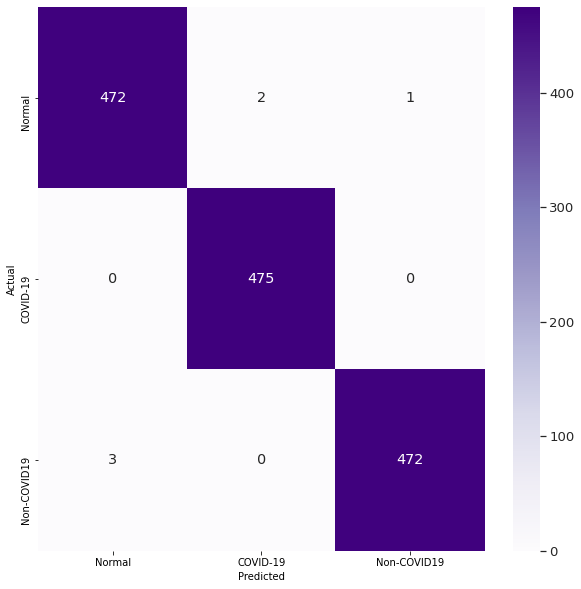

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#cm = confusion_matrix(y_test, y_pred)
# Normalise
#cmn = (Total.astype('float') / Total.sum(axis=1)[:, np.newaxis])*100
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(Total, annot=True, fmt='d',  xticklabels=['Normal','COVID-19','Non-COVID19'], yticklabels=['Normal','COVID-19','Non-COVID19'],cmap="Purples")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


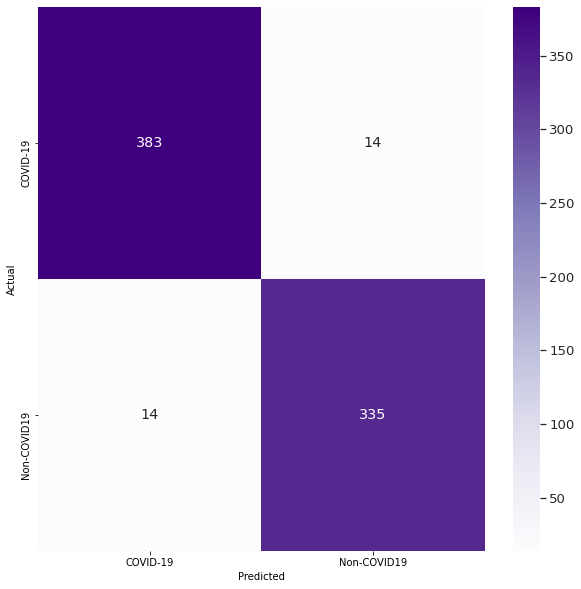

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#cm = confusion_matrix(y_test, y_pred)
# Normalise
#cmn = (Total.astype('float') / Total.sum(axis=1)[:, np.newaxis])*100
Total=Total.astype(int)
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(Total, annot=True, fmt='d', xticklabels=['COVID-19','Non-COVID19'], yticklabels=['COVID-19','Non-COVID19'],cmap="Purples")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
S=[]
for i in range(10):
  S.append(scores[i][0])
np.mean(S)

0.987007874250412

[0.18218623 0.18249725 0.21166317 0.21183835 0.21181501]


array([[0.21316704, 0.23227346, 0.22628002, 0.22145697, 0.10682246],
       [0.44652846, 0.07509867, 0.06845059, 0.18469457, 0.22522765],
       [0.04299782, 0.31969625, 0.0538361 , 0.19877349, 0.38469627],
       [0.09803428, 0.15967624, 0.2345217 , 0.28903618, 0.2187316 ],
       [0.10545254, 0.10046406, 0.04128351, 0.23107983, 0.5217201 ]],
      dtype=float32)

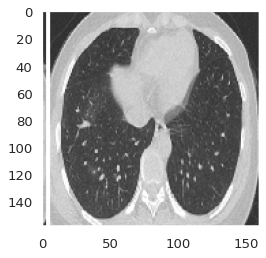

In [ ]:

#CT

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import os
import glob
import pandas as pd
import csv
import re
import numpy as np

i=47
covid_images=glob.glob('/content/drive/My Drive/covid-19/Small_CT_COVID/CT_COVID/*')
from keras.preprocessing import image
img = image.load_img(covid_images[i], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/255, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
#print(clinical_notes[i])

print(han_model.show_doc_attention(X)[i])


han_model.show_sent_attention(X[i])


In [ ]:
pixels.shape

(160, 160, 3)

In [ ]:
plt.imshow(image)

In [ ]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import csv
import re
import numpy as np

i=21

from keras.preprocessing import image
img = image.load_img(covid_images[i], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/255, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
print(clinical_notes[i])

print(han_model.show_doc_attention(X)[i])


han_model.show_sent_attention(X[i])


In [ ]:
i=3
print(han_model.show_doc_attention(X)[i])


han_model.show_sent_attention(X[i])


[0.12412814 0.15687802 0.17190565 0.20399903 0.3430892 ]


array([[0.28294957, 0.19730839, 0.14642595, 0.03359462, 0.3397214 ],
       [0.17413156, 0.18957134, 0.22321975, 0.21051176, 0.20256561],
       [0.2165556 , 0.20641288, 0.22331265, 0.16989093, 0.18382797],
       [0.06869707, 0.25130707, 0.2451338 , 0.2561176 , 0.17874444],
       [0.07842354, 0.2774744 , 0.18690032, 0.24246614, 0.2147356 ]],
      dtype=float32)

In [ ]:
XX=X.tolist()
covid=X_Covid.tolist()

V=[]
for i in range(len(XX)):
  if XX[i] in covid:
     V.append(i)

In [ ]:
han_model.show_doc_attention(X)

infiltrate in the upper lobe of the left lung
[0.26108485 0.23411644 0.18224147 0.10874871 0.2138086 ]


array([[0.36558443, 0.15982786, 0.1546132 , 0.10242865, 0.21754587],
       [0.15159784, 0.13794655, 0.34067246, 0.11303342, 0.25674972],
       [0.26253834, 0.25021803, 0.33918512, 0.07320052, 0.07485804],
       [0.1320959 , 0.3871461 , 0.3228216 , 0.08302367, 0.0749127 ],
       [0.12433012, 0.28509155, 0.3447492 , 0.11116814, 0.13466103]],
      dtype=float32)

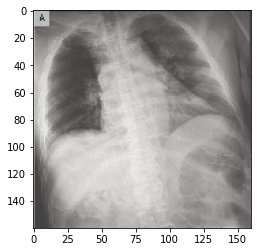

In [ ]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import csv
import re
import numpy as np



i=222

covid_idx=covid.index(XX[V[i]])


from keras.preprocessing import image
img = image.load_img(covid_images[covid_idx], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/255, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
print(clinical_notes[covid_idx])

print(han_model.show_doc_attention(X)[V[i]])


han_model.show_sent_attention(X[V[i]])


In [ ]:
covid_images[83]

'/content/covid-chestxray-dataset/images/covid-19-pneumonia-30-L.jpg'

In [ ]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import csv
import re
import numpy as np

i=270

from keras.preprocessing import image
img = image.load_img(covid_images[i], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/255, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
print(clinical_notes[i])

print(han_model.show_doc_attention(X)[i])


han_model.show_sent_attention(X[i])


IndexError: ignored

In [ ]:
 import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import csv
import re
import numpy as np

i=116

from keras.preprocessing import image
img = image.load_img(covid_images[i], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/255, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
print(clinical_notes[i])

print(han_model.show_doc_attention(X)[i])


han_model.show_sent_attention(X[i])



NameError: ignored

An 83-year-old female patient, presented with fever (38C), dry cough and asthenia for four days. She denied dyspnoea, chest pain, and gastrointestinal symptoms. She lived with her daughter. Laboratory studies revealed elevated serum ferritin (401 ng/mL; normal range 12 ng/mL - 300 ng/mL), slightly increased C-reactive protein (CRP, 7.58 mg/L; normal range <5.0 mg/L). The patient was hospitalised for further care. Later, her 59-years-old daughter presented with fever (38.6C), dry cough, myalgia, headache. The patient was a tobacco cigarette smoker. Axial (a,b), sagittal (c,d) and coronal (e,f) non-contrast chest CT demonstrated multifocal bilateral patchy ground-glass opacities with a predominantly lower and peripheral distribution. It is also evident associated thickness of interlobular septa in the affected areas (crazy-paving pattern) and diffuse bronchial wall thickening.
[0.14757505 0.14786775 0.15276098 0.24411634 0.30767986]


array([[0.14007694, 0.2064261 , 0.21115996, 0.23627508, 0.20606188],
       [0.11969745, 0.1335538 , 0.306168  , 0.11992481, 0.32065597],
       [0.12508957, 0.10818984, 0.06680246, 0.06054018, 0.63937795],
       [0.17919418, 0.2752325 , 0.22020696, 0.1815564 , 0.14380999],
       [0.26349047, 0.23098631, 0.2044752 , 0.16195478, 0.13909324]],
      dtype=float32)

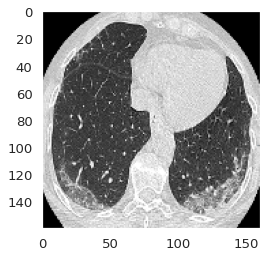

In [ ]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import csv
import re
import numpy as np
plt.rcParams["axes.grid"] = False
i=42

from keras.preprocessing import image
img = image.load_img(covidCT_images[i], target_size=(160, 160))
img_data = image.img_to_array(img)
image = cv2.cvtColor(img_data/255, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
print(clinicalCT_notes[i])

print(han_model.show_doc_attention(X)[i])


han_model.show_sent_attention(X[i])



In [ ]:
i=205
print(han_model.show_doc_attention(X)[i]-0.2)



han_model.show_sent_attention(X[i])-0.2


[-0.06868944 -0.02436359  0.01119852  0.03230321  0.0495512 ]


array([[ 0.04158856,  0.02281861,  0.02359091, -0.01470505, -0.0732931 ],
       [ 0.01100476,  0.08882825,  0.06213538, -0.05672164, -0.10524673],
       [-0.02603929,  0.09998997,  0.08144434, -0.02396499, -0.13143006],
       [-0.06021397,  0.0481115 ,  0.03765868,  0.00636593, -0.03192212],
       [-0.02411015,  0.03229879,  0.02408706,  0.0346421 , -0.06691779]],
      dtype=float32)

In [ ]:
i=33
print(han_model.show_doc_attention(X)[i]-0.2)


han_model.show_sent_attention(X[i])-0.2

[-0.04190131 -0.03217404 -0.01343821 -0.00126293  0.08877651]


array([[-0.04361811,  0.01239799,  0.03140676,  0.02267076, -0.0228575 ],
       [-0.04506117,  0.01946414,  0.03938583,  0.032199  , -0.04598774],
       [ 0.06838425,  0.03586242, -0.04765527,  0.03340316, -0.08999459],
       [ 0.02676488,  0.05820747, -0.05363521, -0.01917672, -0.01216047],
       [ 0.01119146, -0.00910339,  0.01404627, -0.00623339, -0.00990102]],
      dtype=float32)

In [ ]:
idx_covid=[]
idx_normal=[]
idx_other=[]
for i in range(len(y)):
  if y[i]==1:
    idx_covid.append(i)
  if y[i]==0:
    idx_normal.append(i)
  if y[i]==2:
    idx_other.append(i)

In [ ]:
len(idx_other)

3949

In [ ]:
RR=np.array(han_model.show_doc_attention(X)[idx_normal])
sss=pd.DataFrame(RR)
ssss=sss.to_csv('/content/Normal_Attention.csv')

In [ ]:
matrix = np.zeros((25,len(idx_covid)))

In [ ]:
matrix[0]

array([0.35030818, 0.2272777 , 0.1776665 , 0.13179113, 0.11295651,
       0.21837516, 0.24368912, 0.20603444, 0.19155568, 0.14034562,
       0.16370626, 0.2583918 , 0.28873149, 0.23810871, 0.05106175,
       0.17982416, 0.35398251, 0.28734529, 0.12894481, 0.04990323,
       0.14957215, 0.23650919, 0.26222861, 0.25853676, 0.09315332])

In [ ]:
matrix_other = np.zeros((len(idx_other),25))
j=0
for i in idx_other:
  matrix_other[j]=han_model.show_sent_attention(X[i]).flatten() 
  j=j+1


In [ ]:
matrix_normal = np.zeros((len(idx_normal),25))
j=0
for i in idx_normal:
  matrix_normal[j]=han_model.show_sent_attention(X[i]).flatten() 
  j=j+1

In [ ]:
matrix_covid = np.zeros((len(idx_covid),25))
j=0
for i in idx_covid:
  matrix_covid[j]=han_model.show_sent_attention(X[i]).flatten() 
  j=j+1

In [ ]:
import os
os.remove('/content/drive/My Drive/covid-19/x_attention_other.csv')

In [ ]:

sss=pd.DataFrame(X_Normalized_covid)
ssss=sss.to_csv('/content/drive/My Drive/covid-19/Normalized_covid.csv')

In [ ]:
han_model.show_doc_attention(X)[0][0]

0.2620392

In [ ]:
matrix_other_normalized = np.zeros((len(idx_other),25))
j=0
for i in idx_other:
  matrix_other_normalized[j]=han_model.show_sent_attention(X[i]).flatten() 
  j=j+1

In [ ]:
X_Normalized_covid=np.zeros((len(idx_covid),25))
k=0
for i in idx_covid:
  print(k)
  Normalized = np.zeros((5,5))
  for j in range(5):
    Normalized[j]=han_model.show_doc_attention(X)[i][j]*han_model.show_sent_attention(X[i])[j]
  X_Normalized_covid[k]=Normalized.flatten()
  k=k+1


In [ ]:
X_Normalized_covid.mean(0)

array([0.03498912, 0.03547586, 0.05051572, 0.04629258, 0.04861051,
       0.02799503, 0.03906649, 0.04818273, 0.04690221, 0.04266117,
       0.01869841, 0.04663861, 0.06059483, 0.04921148, 0.02129448,
       0.01566351, 0.05029449, 0.0670843 , 0.04020189, 0.01815441,
       0.01780874, 0.04708062, 0.07421265, 0.03439628, 0.01797387])

In [ ]:
#covid
matrix_covid.mean(0)

array([0.18576824, 0.18614597, 0.21793585, 0.20675864, 0.2033913 ,
       0.18205092, 0.19434827, 0.20874746, 0.21588758, 0.19896576,
       0.13791658, 0.22214361, 0.26576702, 0.23328777, 0.14088502,
       0.1263001 , 0.23481118, 0.30363263, 0.20547065, 0.12978545,
       0.15788765, 0.23794223, 0.28201333, 0.19472006, 0.12743674])

In [ ]:
cov.sort()

In [ ]:
matrix_normal.mean(0)

array([0.15792396, 0.16605077, 0.34839324, 0.17863172, 0.14900031,
       0.21339194, 0.18442245, 0.25416746, 0.17301684, 0.17500131,
       0.22970844, 0.19255848, 0.20774845, 0.18665656, 0.18332807,
       0.19805346, 0.19748152, 0.27109764, 0.16533065, 0.16803672,
       0.16355878, 0.20371217, 0.29084763, 0.16118737, 0.18069407])

In [ ]:
matrix_other.mean(0)

array([0.26844312, 0.1746437 , 0.18144503, 0.165632  , 0.20983615,
       0.22803596, 0.17844591, 0.18845267, 0.19128033, 0.21378513,
       0.19724791, 0.18828107, 0.21207274, 0.20509358, 0.1973047 ,
       0.19169968, 0.20097188, 0.2243877 , 0.19607421, 0.18686653,
       0.16968473, 0.1941751 , 0.2599686 , 0.17966077, 0.19651081])

In [ ]:
matrix_normal.mean(0)

array([0.14731021, 0.17767102, 0.30667831, 0.20150514, 0.16683532,
       0.15023014, 0.18399816, 0.29273921, 0.19943339, 0.1735991 ,
       0.17551003, 0.18614284, 0.23503831, 0.19525646, 0.20805237,
       0.16710031, 0.20181101, 0.28731063, 0.18003896, 0.1637391 ,
       0.15592408, 0.21974316, 0.25753511, 0.2063521 , 0.16044555])

In [ ]:
han_model.show_doc_attention(X)[idx_normal].mean(0)

array([0.39365327, 0.20395377, 0.10314895, 0.12329375, 0.1759502 ],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[idx_other].mean(0)

array([0.27022064, 0.1649256 , 0.14666411, 0.17071202, 0.24747722],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[idx_covid].mean(0)

array([0.1861875 , 0.19780914, 0.20887007, 0.21576579, 0.19136748],
      dtype=float32)

In [ ]:
data

array([[0.18144824, 0.17756657, 0.18227655, 0.16758707, 0.29112157],
       [0.21508864, 0.18932164, 0.19043843, 0.2061054 , 0.19904594],
       [0.19212873, 0.20833932, 0.21110877, 0.20919982, 0.17922337],
       ...,
       [0.23360208, 0.18830398, 0.24227662, 0.18902774, 0.1467896 ],
       [0.1888832 , 0.17855033, 0.18897781, 0.22230282, 0.22128583],
       [0.19610523, 0.23777902, 0.21744741, 0.18778607, 0.1608823 ]],
      dtype=float32)

In [ ]:
data1=han_model.show_doc_attention(X)[idx_covid]
sss=pd.DataFrame(data1)
sss.to_csv('/content/covid.csv')

In [ ]:
data

array([[0.18923743, 0.21339749, 0.21674305, 0.20799921, 0.17262292],
       [0.23257355, 0.20938489, 0.20501235, 0.18722829, 0.16580091],
       [0.11669628, 0.21444817, 0.22586699, 0.23792364, 0.20506486],
       ...,
       [0.16444102, 0.1505334 , 0.21573311, 0.24104348, 0.22824903],
       [0.21700712, 0.20087267, 0.20206873, 0.1922565 , 0.18779501],
       [0.21867803, 0.19404303, 0.19218506, 0.20097008, 0.19412382]],
      dtype=float32)

[Text(0, 0.5, 'Attention score'), Text(0.5, 0, 'Image blocks (y)')]

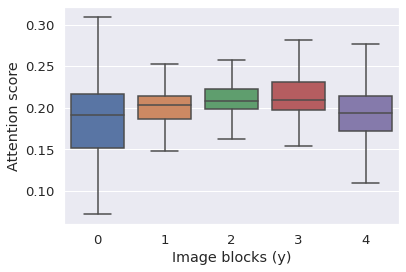

In [ ]:
import seaborn as sns
#dataa=pd.read_csv('/content/covid.csv')
dataa=data1
ax = sns.boxplot(data=dataa,showfliers = False)
ax.set(xlabel='Image blocks (y)', ylabel='Attention score')
#plt.plot(x, data)
#plt.show()



[Text(0, 0.5, 'Attention score'), Text(0.5, 0, 'Image blocks (y)')]

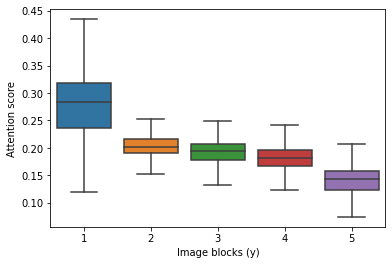

In [ ]:
dataa=pd.read_csv('/content/normal.csv')

ax = sns.boxplot(data=dataa,showfliers = False)
ax.set(xlabel='Image blocks (y)', ylabel='Attention score')

[Text(0, 0.5, 'Attention score'), Text(0.5, 0, 'Image blocks (y)')]

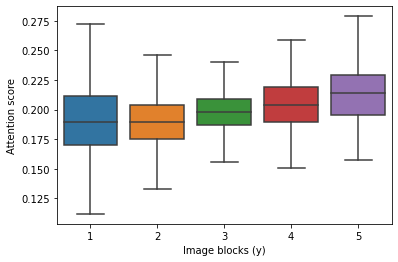

In [ ]:
dataa=pd.read_csv('/content/covid.csv')
ax = sns.boxplot(data=dataa,showfliers = False)
ax.set(xlabel='Image blocks (y)', ylabel='Attention score')

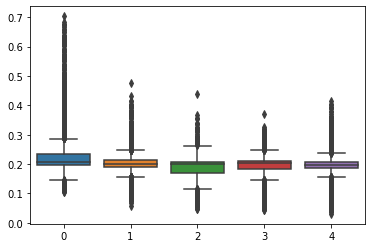

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=han_model.show_doc_attention(X)[idx_other])

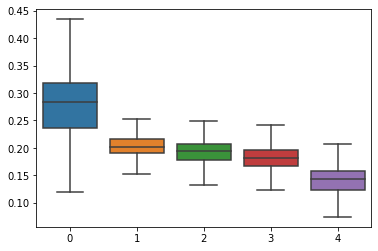

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=han_model.show_doc_attention(X)[idx_normal],showfliers = False)

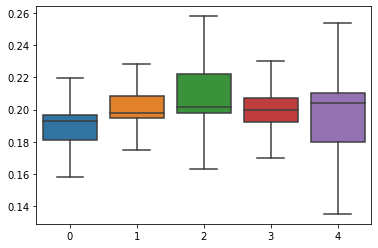

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=han_model.show_doc_attention(X)[idx_other],showfliers = False)

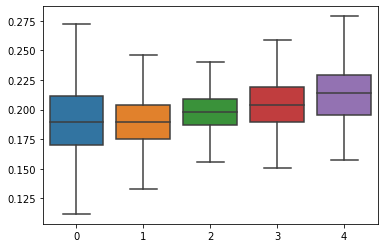

In [ ]:
ax = sns.boxplot(data=han_model.show_doc_attention(X)[idx_covid],showfliers = False)

In [ ]:
han_model.show_doc_attention(X)[idx_normal[100:200]]

array([[0.22038168, 0.1729764 , 0.18281019, 0.18898444, 0.23484734],
       [0.21872947, 0.18624206, 0.1801194 , 0.19587807, 0.21903098],
       [0.21587893, 0.1974981 , 0.19333073, 0.19872025, 0.19457196],
       [0.36803153, 0.23937248, 0.17022641, 0.10984316, 0.11252651],
       [0.21667929, 0.19894995, 0.19359511, 0.19761865, 0.19315696],
       [0.23413953, 0.20036711, 0.18984088, 0.19014782, 0.18550467],
       [0.34798995, 0.21679085, 0.1301936 , 0.17101169, 0.13401389],
       [0.2425905 , 0.22116919, 0.2035743 , 0.11593889, 0.21672703],
       [0.22370563, 0.20465937, 0.18005623, 0.2013567 , 0.19022208],
       [0.19400758, 0.17928529, 0.17573756, 0.19650607, 0.2544634 ],
       [0.25519848, 0.15366828, 0.11662031, 0.22664344, 0.24786945],
       [0.24247767, 0.20419626, 0.18591385, 0.18234406, 0.18506819],
       [0.21047963, 0.16484992, 0.20774548, 0.21091016, 0.20601484],
       [0.2034567 , 0.19498761, 0.1932055 , 0.20264545, 0.20570478],
       [0.23338354, 0.18976447, 0.

In [ ]:
han_model.show_doc_attention(X)[idx_covid[100:200]]

array([[0.19306141, 0.17872655, 0.20928225, 0.2071317 , 0.2117981 ],
       [0.207595  , 0.19576974, 0.19819589, 0.20078002, 0.1976593 ],
       [0.19723241, 0.1964193 , 0.19656706, 0.2064424 , 0.20333882],
       [0.24080534, 0.22969897, 0.17601909, 0.17805472, 0.17542188],
       [0.2029692 , 0.19982778, 0.19951521, 0.19870582, 0.19898197],
       [0.18824716, 0.20292869, 0.20666169, 0.20515947, 0.19700293],
       [0.1962275 , 0.20100982, 0.21050617, 0.18631548, 0.20594098],
       [0.20566657, 0.19096307, 0.20308661, 0.20320304, 0.19708078],
       [0.20284311, 0.20879629, 0.19568229, 0.19653575, 0.19614257],
       [0.19626255, 0.19726361, 0.19952728, 0.2051601 , 0.20178653],
       [0.19993682, 0.20953114, 0.18831983, 0.20715527, 0.19505696],
       [0.20709403, 0.19162866, 0.19038782, 0.19600739, 0.21488208],
       [0.20350796, 0.20355979, 0.19516088, 0.18832722, 0.20944417],
       [0.20671217, 0.20507191, 0.20038901, 0.1942459 , 0.19358099],
       [0.20113374, 0.20001799, 0.

In [ ]:
han_model.show_doc_attention(X)[idx_other[100:200]]

array([[0.18111031, 0.18691827, 0.20569396, 0.21191646, 0.21436095],
       [0.19925559, 0.19907413, 0.19952187, 0.20044105, 0.20170742],
       [0.13323802, 0.15887672, 0.2108426 , 0.24994965, 0.24709305],
       [0.20021214, 0.20030206, 0.19992563, 0.20003484, 0.19952534],
       [0.1794639 , 0.18710846, 0.21067247, 0.20956527, 0.21318999],
       [0.2014915 , 0.20103209, 0.1959048 , 0.20046625, 0.2011054 ],
       [0.2002675 , 0.19931981, 0.19742471, 0.19656163, 0.20642634],
       [0.21334067, 0.21070336, 0.20852233, 0.19930719, 0.1681264 ],
       [0.18068376, 0.18566728, 0.20723075, 0.2102539 , 0.21616434],
       [0.20405911, 0.20113994, 0.19652832, 0.19621314, 0.20205945],
       [0.19979243, 0.20103112, 0.19687873, 0.20025982, 0.2020379 ],
       [0.1910041 , 0.18921596, 0.2021191 , 0.20673493, 0.21092595],
       [0.20201236, 0.19514534, 0.20095623, 0.20155509, 0.20033093],
       [0.17060748, 0.20820984, 0.20695983, 0.20630278, 0.20792013],
       [0.19182986, 0.19838655, 0.

In [ ]:
y[252]

2.0

In [ ]:
han_model.show_doc_attention(X)[251]

array([0.38159552, 0.1516148 , 0.13712184, 0.15263233, 0.1770356 ],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[:100]

In [ ]:
han_model.show_doc_attention(X)[100:200]

In [ ]:
han_model.show_doc_attention(X)[100:200]

In [ ]:
han_model.show_doc_attention(X)[100:200]

In [ ]:
han_model.show_sent_attention(X[22])

array([[0.22671922, 0.22102475, 0.18052931, 0.1742922 , 0.19743453],
       [0.22217196, 0.21961848, 0.20876569, 0.17546579, 0.17397809],
       [0.263857  , 0.24270648, 0.16342317, 0.17624784, 0.15376551],
       [0.1697304 , 0.2576597 , 0.25585315, 0.1634866 , 0.15327018],
       [0.19259313, 0.22037369, 0.22592969, 0.2314083 , 0.12969513]],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[0])

array([[0.19996507, 0.20004058, 0.19998987, 0.19992207, 0.20008244],
       [0.19989641, 0.19998701, 0.2000439 , 0.20004785, 0.20002483],
       [0.20032011, 0.20046207, 0.20014559, 0.19986065, 0.19921155],
       [0.20003411, 0.20003866, 0.19998474, 0.20003162, 0.1999108 ],
       [0.19993763, 0.20037465, 0.19944866, 0.19966958, 0.20056944]],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[400])

array([[0.20039181, 0.19980629, 0.20000638, 0.19972816, 0.20006737],
       [0.20024051, 0.20014122, 0.19990778, 0.19983546, 0.19987495],
       [0.20025869, 0.2000512 , 0.1995135 , 0.20010358, 0.20007306],
       [0.2000919 , 0.20009413, 0.19955987, 0.20017876, 0.20007536],
       [0.20017466, 0.19974378, 0.19949602, 0.20019299, 0.20039256]],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[220:350]

In [ ]:
han_model.show_sent_attention(X[228])

array([[0.20490858, 0.25000927, 0.1883186 , 0.20485328, 0.15191041],
       [0.20933281, 0.19900873, 0.19605993, 0.1946521 , 0.20094645],
       [0.20750545, 0.19758527, 0.19869854, 0.19829787, 0.19791284],
       [0.20236361, 0.20070419, 0.20228364, 0.19863056, 0.19601806],
       [0.20754743, 0.19774608, 0.19905332, 0.19813552, 0.19751754]],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[:60]

In [ ]:
other=glob.glob('/content/drive/My Drive/covid-19/Data/Other_PNEUMONIA/*')

In [ ]:
other[60:120]

In [ ]:
han_model.show_doc_attention(X)[60:120]

array([[0.1912328 , 0.200677  , 0.20338175, 0.20302919, 0.20167927],
       [0.19270578, 0.20068125, 0.20172518, 0.20303757, 0.20185015],
       [0.18441351, 0.20683458, 0.2075378 , 0.20447727, 0.19673684],
       [0.18886983, 0.20205033, 0.20322694, 0.2031718 , 0.20268106],
       [0.17500964, 0.2070742 , 0.20704772, 0.20713358, 0.20373495],
       [0.18694623, 0.19841732, 0.20476288, 0.20539287, 0.20448062],
       [0.13673104, 0.21550944, 0.21988349, 0.21615514, 0.2117209 ],
       [0.19507146, 0.20029908, 0.20198521, 0.20356569, 0.1990786 ],
       [0.21475032, 0.13902825, 0.15107064, 0.25214013, 0.24301073],
       [0.18751484, 0.19943437, 0.20371684, 0.20490286, 0.20443106],
       [0.09491085, 0.22192517, 0.22651646, 0.22770506, 0.22894245],
       [0.19764048, 0.1995407 , 0.20064195, 0.20070462, 0.20147221],
       [0.20071977, 0.20393322, 0.20422047, 0.2043721 , 0.18675442],
       [0.19610967, 0.19995528, 0.20011553, 0.20174116, 0.20207834],
       [0.1960513 , 0.2007713 , 0.

In [ ]:
han_model.show_doc_attention(X)[300]

array([0.19546658, 0.1993735 , 0.20069934, 0.20110063, 0.20335996],
      dtype=float32)

In [ ]:
i=4
han_model.show_doc_attention(X)[60]

array([5.1263025e-05, 3.1594768e-01, 3.1748146e-01, 3.1718004e-01,
       4.9339600e-02], dtype=float32)

In [ ]:
han_model.show_sent_attention(X[1])

array([[1.8732545e-01, 2.2130275e-01, 1.8816940e-01, 1.9843240e-01,
        2.0476998e-01],
       [6.3351780e-01, 2.5077413e-03, 2.9649681e-03, 3.1604317e-01,
        4.4966340e-02],
       [1.8603969e-01, 1.2068981e-01, 1.5741871e-01, 2.6278898e-01,
        2.7306283e-01],
       [1.8213709e-01, 1.8805042e-01, 2.0016478e-01, 2.1380097e-01,
        2.1584681e-01],
       [1.5596100e-04, 2.1518217e-01, 2.6811618e-01, 2.5215867e-01,
        2.6438695e-01]], dtype=float32)

In [ ]:
han_model.show_sent_attention(X[60])

array([[1.3276035e-04, 1.3010004e-01, 4.2679149e-01, 4.2108628e-01,
        2.1889472e-02],
       [1.8503028e-01, 1.8836533e-01, 2.5152132e-01, 1.8731861e-01,
        1.8776448e-01],
       [2.0038022e-01, 2.0677912e-01, 1.9559473e-01, 2.0130496e-01,
        1.9594097e-01],
       [1.9944249e-01, 1.9974162e-01, 1.9792911e-01, 2.0426387e-01,
        1.9862288e-01],
       [1.4875509e-02, 1.7498419e-02, 2.5120895e-02, 9.2540073e-01,
        1.7104393e-02]], dtype=float32)

In [ ]:
han_model.show_sent_attention(X[4060])

array([[1.6679110e-08, 1.3240302e-07, 3.2133042e-07, 1.1498729e-06,
        9.9999833e-01],
       [1.0072936e-01, 2.3704620e-01, 2.3666897e-01, 2.4660285e-01,
        1.7895268e-01],
       [1.7936675e-01, 1.9353874e-01, 1.7486002e-01, 2.7697140e-01,
        1.7526303e-01],
       [1.6982470e-01, 2.1882670e-01, 2.1065281e-01, 1.7017408e-01,
        2.3052169e-01],
       [2.1076393e-01, 2.1801412e-01, 2.1291022e-01, 1.6473277e-01,
        1.9357891e-01]], dtype=float32)

In [ ]:
han_model.show_sent_attention(X[1])

array([[2.80046891e-07, 3.58445525e-01, 3.93431576e-04, 7.69727444e-03,
        6.33463442e-01],
       [5.89893870e-02, 2.01547728e-03, 6.99306111e-05, 9.37482059e-01,
        1.44324021e-03],
       [3.53453517e-01, 2.95582682e-01, 7.57000148e-02, 1.27285987e-01,
        1.47977844e-01],
       [3.71908844e-01, 3.15995455e-01, 1.62069485e-01, 1.10882215e-01,
        3.91440280e-02],
       [1.46343973e-06, 2.11270317e-01, 7.76944757e-01, 1.17028086e-02,
        8.06778989e-05]], dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[4001]

array([0.19098364, 0.20401792, 0.20256501, 0.20146257, 0.20097081],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[11])

array([[0.16106708, 0.19647828, 0.22401085, 0.22396322, 0.19448058],
       [0.12305079, 0.19086027, 0.23207222, 0.23205452, 0.22196212],
       [0.11228648, 0.28715718, 0.29568696, 0.28638157, 0.01848787],
       [0.17740926, 0.21311954, 0.21313752, 0.21276528, 0.1835684 ],
       [0.19915052, 0.20043884, 0.20104888, 0.20103662, 0.19832511]],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[1000])

array([[0.19231054, 0.19227937, 0.19374578, 0.18341278, 0.2382516 ],
       [0.21479703, 0.20989461, 0.21479581, 0.20989642, 0.15061614],
       [0.29324615, 0.20204361, 0.16263634, 0.19740145, 0.14467242],
       [0.22524582, 0.22751951, 0.23138773, 0.15086317, 0.16498376],
       [0.11993418, 0.19305432, 0.1790927 , 0.2880675 , 0.21985126]],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[400]

array([0.16137157, 0.16159365, 0.16186038, 0.16475147, 0.3504229 ],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)

array([[0.09141438, 0.19066343, 0.25984475, 0.2820307 , 0.17604677],
       [0.06142208, 0.16576308, 0.21384227, 0.25322416, 0.30574843],
       [0.10012753, 0.17877363, 0.20527153, 0.23266776, 0.2831596 ],
       ...,
       [0.19999845, 0.20000122, 0.20000131, 0.20000122, 0.19999778],
       [0.19998857, 0.20000374, 0.20000498, 0.20000479, 0.19999792],
       [0.19990593, 0.20003818, 0.20003751, 0.20003618, 0.1999822 ]],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[150]

array([0.05099296, 0.15654662, 0.20654659, 0.2526172 , 0.3332967 ],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[150])[0]

array([0.199266  , 0.1987258 , 0.19862136, 0.20111799, 0.20226884],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[180]

array([0.19995825, 0.20001413, 0.20001213, 0.20001003, 0.20000546],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[180])[3]

array([0.19989976, 0.19988094, 0.20001566, 0.19986698, 0.20033662],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)

array([[0.20036823, 0.19907893, 0.19884194, 0.1990876 , 0.20262334],
       [0.20141855, 0.19923264, 0.19817975, 0.19834322, 0.20282589],
       [0.1995034 , 0.19784959, 0.20491762, 0.19953524, 0.19819409],
       ...,
       [0.20099276, 0.20020917, 0.19958699, 0.19956817, 0.19964291],
       [0.20436761, 0.20467845, 0.20567563, 0.20253834, 0.18274002],
       [0.20012704, 0.20004699, 0.19995241, 0.1999238 , 0.19994986]],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[200])[4]

array([0.19842142, 0.1996546 , 0.20039743, 0.20181829, 0.19970828],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)

array([[0.07767974, 0.13420686, 0.20989142, 0.3272733 , 0.25094867],
       [0.09020305, 0.13488059, 0.18120432, 0.2424521 , 0.35125992],
       [0.10999661, 0.14767817, 0.19573103, 0.23991796, 0.30667624],
       ...,
       [0.05317561, 0.21312591, 0.24406372, 0.24467653, 0.2449581 ],
       [0.19491968, 0.20552972, 0.20585643, 0.19839336, 0.19530079],
       [0.05666084, 0.23479119, 0.2359149 , 0.23606399, 0.2365691 ]],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[100])[2]

array([0.2313405 , 0.19536518, 0.19402367, 0.19220074, 0.18706995],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[400])[0]

array([0.18740879, 0.19181795, 0.19677995, 0.19786058, 0.22613275],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[1000])[4]

array([0.20045365, 0.20135483, 0.1998962 , 0.20154522, 0.19675006],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[10])[4]

array([0.1768509 , 0.18768159, 0.1927734 , 0.20407759, 0.23861653],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[10]

array([0.12127797, 0.1700883 , 0.19541831, 0.22705698, 0.28615838],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[11]

array([0.09462649, 0.13449182, 0.17857158, 0.24237533, 0.34993476],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[11])

array([[0.1939801 , 0.1903263 , 0.19394656, 0.19907221, 0.22267483],
       [0.20352012, 0.19701649, 0.18903762, 0.19885886, 0.21156693],
       [0.20626576, 0.19497739, 0.19606608, 0.19542404, 0.2072668 ],
       [0.20269275, 0.20055498, 0.2000762 , 0.1963881 , 0.20028804],
       [0.20879544, 0.19805233, 0.20999697, 0.19816367, 0.18499146]],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[200]

array([0.19785133, 0.20019275, 0.20039088, 0.20068592, 0.20087913],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[200])

array([[0.19587961, 0.20460373, 0.2064879 , 0.20014872, 0.19288003],
       [0.1933336 , 0.20389952, 0.20640351, 0.20817752, 0.18818586],
       [0.17403302, 0.20669541, 0.20828377, 0.20828664, 0.20270112],
       [0.19237176, 0.20170791, 0.20265   , 0.20265   , 0.2006204 ],
       [0.18981634, 0.2015388 , 0.201539  , 0.201539  , 0.20556687]],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[201])

array([[0.16919856, 0.16307494, 0.16245964, 0.32337508, 0.18189187],
       [0.20315692, 0.20578651, 0.20684949, 0.19184746, 0.19235954],
       [0.18888772, 0.20521343, 0.20543957, 0.20464818, 0.19581112],
       [0.19489442, 0.20211619, 0.1989577 , 0.20215103, 0.20188066],
       [0.19069958, 0.19813477, 0.20647596, 0.20087565, 0.20381397]],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[202]

array([0.00138039, 0.24574167, 0.251066  , 0.2509426 , 0.2508693 ],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[202])

array([[0.19544347, 0.21337357, 0.19846793, 0.18667498, 0.20604013],
       [0.17745209, 0.17998174, 0.17992751, 0.18144053, 0.28119808],
       [0.20433065, 0.20456415, 0.20469537, 0.20013748, 0.18627234],
       [0.20163643, 0.1965396 , 0.20083126, 0.20069993, 0.2002928 ],
       [0.20024274, 0.20071124, 0.20113844, 0.19889922, 0.19900836]],
      dtype=float32)

In [ ]:
han_model.show_doc_attention(X)[123]

array([0.08556817, 0.15157774, 0.20472355, 0.25850078, 0.2996297 ],
      dtype=float32)

In [ ]:
han_model.show_sent_attention(X[123])

array([[0.16243753, 0.22864674, 0.2272573 , 0.19430304, 0.18735541],
       [0.2263875 , 0.1704175 , 0.19623351, 0.20074768, 0.20621385],
       [0.16842061, 0.12468806, 0.23945089, 0.22224517, 0.24519524],
       [0.21281515, 0.18418689, 0.20152663, 0.20073582, 0.2007355 ],
       [0.22607288, 0.19882856, 0.17089407, 0.18878832, 0.21541612]],
      dtype=float32)

In [ ]:
len(X)

4111

In [ ]:

sent_att=np.empty((4176,5,5),dtype=None)
for i in range(len(X)):
  sent_att[i]=han_model.show_sent_attention(X[i])

In [ ]:
np.savez('/content/drive/My Drive/covid-19/final_doc_sent_att_epochs=10_batch_size=20_fold5.npz',doc=han_model.show_doc_attention(X), sent=sent_att)

In [ ]:
sent_att[2]

array([[0.15256384, 0.21673942, 0.21577665, 0.21458189, 0.20033818],
       [0.15234029, 0.22388138, 0.22293834, 0.22144061, 0.1793994 ],
       [0.13854288, 0.21612467, 0.21557465, 0.21704732, 0.21271048],
       [0.10894048, 0.21617006, 0.21466686, 0.21853516, 0.24168745],
       [0.20770878, 0.19884345, 0.19161786, 0.1988814 , 0.20294853]])

In [ ]:
doc=han_model.show_doc_attention(X)

In [ ]:
doc[3]

array([0.11107066, 0.17820878, 0.21547902, 0.22652638, 0.2687152 ],
      dtype=float32)

Compare HAN with ordinary Model

In [ ]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(160, 160, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 
 optimizer=optimizers.Adam(lr=LEARNING_RATE),
 metrics=['acc'])

In [ ]:
#####K-fold Cross Validation#####
from sklearn.model_selection import StratifiedKFold
TEST_SPLIT=0.1

#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=TEST_SPLIT, random_state=0, stratify=y)

kFold = StratifiedKFold(n_splits=10)
scores = []
idx = 0
for train, test in kFold.split(X, y):
  idx = idx+1
  print("fold:", idx)
  X_tr=X[train]
  y_tr=y[train]
  X_test=X[test]
  y_test=y[test]
  X_train, X_val, y_train, y_val= train_test_split(X_tr, y_tr, test_size=TEST_SPLIT, random_state=0, stratify=y_tr)
  del X_tr
  y_train=to_categorical(y_train, num_classes=3)
  y_val=to_categorical(y_val, num_classes=3)
  y_test=to_categorical(y_test, num_classes=3)

  R=han_model.train_model(checkpoint_path, np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val), np.array(X_test), np.array(y_test), epochs=10,batch_size=20)
  scores.append(R)
  del X_train
  del X_test
print(scores)
#print(scores.mean())

fold: 1
Train on 4698 samples, validate on 522 samples
Epoch 1/10
4698/4698 [==============================] - 8s 2ms/step - loss: 0.3642 - acc: 0.8557 - val_loss: 0.1478 - val_acc: 0.9464

Epoch 00001: val_loss improved from inf to 0.14781, saving model to /content/model.01-0.15.hdf5
Epoch 2/10
4698/4698 [==============================] - 7s 1ms/step - loss: 0.1580 - acc: 0.9425 - val_loss: 0.1103 - val_acc: 0.9540

Epoch 00002: val_loss improved from 0.14781 to 0.11025, saving model to /content/model.02-0.11.hdf5
Epoch 3/10
4698/4698 [==============================] - 7s 1ms/step - loss: 0.1383 - acc: 0.9506 - val_loss: 0.0901 - val_acc: 0.9674

Epoch 00003: val_loss improved from 0.11025 to 0.09008, saving model to /content/model.03-0.09.hdf5
Epoch 4/10
4698/4698 [==============================] - 7s 1ms/step - loss: 0.1207 - acc: 0.9566 - val_loss: 0.0902 - val_acc: 0.9655

Epoch 00004: val_loss did not improve from 0.09008
Epoch 5/10
4698/4698 [==============================] - 7s

ValueError: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import glob
import pandas as pd
import csv
import re
import numpy as np


datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode='constant')

Covid=glob.glob('/content/drive/My Drive/covid-19/Data/covid/*')

for f in Covid:

  img = load_img(f)  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/My Drive/covid-19/Data/covid/', save_prefix='aug', save_format='jpeg'):
    i += 1
    #print(batch)

    if i > 64:
        break  # otherwise the generator would loop indefinitely



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
import os
import glob
import pandas as pd
import csv
import re
import numpy as np

Covid=glob.glob('/content/drive/My Drive/covid-19/Data/covid/*')

In [ ]:
len(Covid)

6839

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
Y=[0,1,2]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
dummy_y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
import random
X = [4, 8, 15, 16, 23, 42]
x = list(enumerate(X))
random.shuffle(x)
indices, l = zip(*x)

In [ ]:
x

[(3, 16), (1, 8), (2, 15), (5, 42), (4, 23), (0, 4)]

In [ ]:
x[1][0]

16

In [ ]:
for i in range(len(x)):
  for j in range(3):
    print(x[])

(15, 16, 4, 23, 42, 8)

In [ ]:
indices

(2, 3, 0, 4, 5, 1)

In [ ]:
####Classification reports
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = [1, -1,  0,  0,  1, -1,  1,  0, -1,  0,  1, -1,  1,  0,  0, -1,  0]
y_prediction = [-1, -1,  1,  0,  0,  0,  0, -1,  1, -1,  1,  1,  0,  0,  1,  1, -1]
cnf_matrix = confusion_matrix(y_true, y_prediction)
print(cnf_matrix)
#[[1 1 3]
# [3 2 2]
# [1 3 1]]

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
F1=(2* np.multiply(TPR,PPV))/(TPR+PPV)

[[1 1 3]
 [3 2 2]
 [1 3 1]]


In [ ]:
from operator import truediv
import numpy as np

TP = np.diag(cnf_matrix)
prec = list(map(truediv, TP, np.sum(cnf_matrix, axis=0)))
rec = list(map(truediv, TP, np.sum(cnf_matrix, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

In [ ]:
import numpy as np
import pandas as pd
EX2=pd.read_csv('/content/drive/My Drive/covid-19/Results/Experimen7.csv')

In [ ]:
acc=np.array(EX2['0'])
acc = [[i] for i in acc]

In [ ]:
np.array(EX2['1'])

array(['[[115   4]\n [  6 121]]', '[[124   4]\n [  0 118]]',
       '[[117   0]\n [  1 128]]', '[[131   2]\n [  0 113]]',
       '[[105   0]\n [  1 140]]', '[[120   0]\n [  0 126]]',
       '[[130   0]\n [  0 116]]', '[[120   0]\n [  0 126]]',
       '[[127   0]\n [  0 118]]', '[[130   0]\n [  0 115]]'], dtype=object)

In [ ]:
cm2=[[[147 ,  0  , 6], [  0, 162  , 0],[  8  , 0 ,152]],
       [[142 ,  0  , 7],[  0 ,161  , 0],[  3 ,  0 ,162]],
       [[164  , 0 ,  4], [  0, 162  , 0],[  6 ,  0 ,139]],
       [[141 ,  0  , 4],[  0 ,173 ,  0],[  0 ,  0 ,157]],
       [[168 ,  0 ,  2],[  0 ,170 ,  0], [  1  , 0 ,134]],
       [[149  , 0 ,  1],[  0 ,161  , 0], [  0 ,  0, 164]],
       [[162 ,  0  , 1], [  0 ,145  , 0], [  0 ,  0, 167]],
       [[164 ,  0  , 3],[  0, 146 ,  0],[  0 ,  0 ,162]],
       [[155 ,  0  , 1],[  0 ,142  , 0], [  2 ,  0 ,175]],
       [[162,   0,   0], [  0 ,161 ,  0],[  1 ,  0 ,150]]]

In [ ]:
cm3=[[[120 , 11], [  7 ,116]],[[121 ,  3], [  1 ,129]],
       [[113  , 2], [  2 ,137]], [[127  , 0], [  0 ,127]],
       [[110  , 2],[  2 ,140]], [[121  , 1],[  0 ,132]],
       [[119 ,  0], [  1 ,134]], [[123 ,  1],[  0 ,130]],
       [[120 ,  0], [  0 ,134]], [[135 ,  0],[  0 ,119]]]

In [ ]:
cm4=[[[111 , 12], [  2 ,124]], [[119  , 6], [  2 ,121]],
       [[116 ,  3], [  0 ,129]], [[123 ,  1], [  0 ,124]],
       [[113  , 0], [  1, 134]], [[123  , 0], [  0 ,125]],
       [[127  , 0], [  2, 119]], [[117  , 0], [  0 ,131]],
       [[125  , 0], [  0 ,123]], [[133  , 0], [  0 ,115]]]

In [ ]:
cm5=[[[115 ,  4],[  6, 121]], [[124 ,  4], [  0, 118]],
       [[117 ,  0], [  1, 128]], [[131  , 2], [  0 ,113]],
       [[105 ,  0], [  1 ,140]], [[120 ,  0], [  0 ,126]],
       [[130 ,  0], [  0 ,116]], [[120  , 0], [  0 ,126]],
       [[127 ,  0], [  0 ,118]], [[130  , 0], [  0 ,115]]]

In [ ]:
cm7=[[[35 , 9], [ 7 ,24]], [[40 , 2], [ 2 ,31]],
       [[36 , 2], [ 1 ,36]], [[36 , 1], [ 1 ,37]],
       [[42 , 0],[ 1 ,32]], [[40 , 0], [ 2 ,33]],
       [[41 , 0], [ 0 ,33]], [[40 , 0], [ 0 ,34]],
       [[33 , 0], [ 0, 41]],[[40 , 0], [ 0 ,34]]]

In [ ]:
cm1=[[[130 ,  1  ,12], [  0 , 36  , 0], [ 11 ,  0 ,411]],
       [[167 ,  0 ,  9], [  0 , 42 ,  0], [  8 ,  0 ,375]],
       [[150  , 0  , 5], [  0 , 47 ,  0], [  6 ,  0, 393]],
       [[149 ,  0 ,  6], [  1 , 51  , 0], [  3 ,  0, 391]],
       [[149  , 0 ,  1], [  0 , 48 ,  0], [ 11  , 0 ,392]],
       [[145 ,  0  , 2], [  0 , 47  , 0], [  6,   0 ,401]],
       [[159 ,  0  , 0], [  0 , 54  , 0], [  3  , 0, 385]],
       [[157 ,  0  , 1], [  0 , 50  , 0], [  4 ,  0 ,388]],
       [[169 ,  0 ,  2], [  0 , 51 ,  0], [  4 ,  0 ,374]],
       [[169 ,  0 ,  0], [  0 , 48  , 0], [  1 ,  0 ,382]]]

In [ ]:
cm6=[[[136 ,  0  , 3] ,[  0 , 17 ,  0] ,[  9 ,  0 ,127]],
       [[133 ,  0  , 2] ,[  1 , 21  , 0] ,[  1 ,  0 ,134]],
       [[145 ,  0  , 0] ,[  0 , 23  , 0] ,[  1 ,  0 ,123]],
       [[129 ,  0  , 1] ,[  0 , 19  , 0] ,[ 12  , 1, 130]],
       [[136 ,  0  , 1] ,[  1 , 31  , 0] ,[  0 ,  0 ,123]],
       [[117  , 0  , 0] ,[  0 , 22  , 0] ,[  5  , 0 ,147]],
       [[125  , 0  , 0] ,[  0 , 22  , 0] ,[  0  , 0 ,144]],
       [[143  , 0  , 0] ,[  0 , 22  , 0] ,[  2 ,  0 ,124]],
       [[139  , 0  , 0] ,[  0 , 22  , 0] ,[  0 ,  0, 130]],
       [[140  , 0 ,  1], [  0 , 18  , 0], [  0 ,  0, 132]]]

In [ ]:
cm8=[[[25 , 0 , 0], [ 1 ,19 , 0],[ 4 , 0 ,17]],
       [[20 , 0 , 1], [ 0, 26 , 0], [ 0,  0 ,19]],
       [[22 , 0 , 2], [ 0 ,16 , 0], [ 0 , 0, 26]],
       [[25 , 0  ,0], [ 0, 21 , 0] ,[ 0 , 0 ,20]],
       [[24 , 0 , 0], [ 0 ,23 , 0] ,[ 0  ,0 ,19]],
       [[17 , 0 , 0], [ 0 ,23 , 0], [ 0 , 0, 26]],
       [[24 , 0 , 0],[ 1 ,14  ,0] ,[ 0 , 0 ,27]],
       [[17 , 0 , 0], [ 0, 24 , 0] ,[ 0  ,0 ,24]],
       [[23 , 0  ,0], [ 0 ,25 , 0],[ 0 , 0 ,17]],
       [[19 , 0  ,0], [ 0, 26 , 0], [ 0 , 0 ,20]]]

In [ ]:
cm9=[[[129,   0  , 5],[  0 ,143 ,  0],[ 10  , 1,116]],
       [[116  , 0  , 1], [  0 ,149 ,  0],[  3  , 0, 135]],
       [[130 ,  0  , 1], [  0 ,127  , 0], [  0  , 0 ,146]],
       [[129 ,  0 ,  1], [  0, 144 ,  0], [  1  , 0 ,129]],
       [[135 ,  0 ,  0], [  0 ,147 ,  0], [  2 , 0 ,120]],
       [[136 ,  0 ,  1],[  0 ,121 ,  0], [  0 ,  0, 145]],
       [[136  , 0  , 1], [  0 ,129  , 0], [  0  , 0 ,137]],
       [[155  , 0  , 0],[  0 ,114  , 0], [  2  , 0 ,132]],
       [[120  , 0 ,  0],[  0 ,146  , 0],[  1 , 0 ,136]],
       [[148  , 0  , 1], [  0 ,125  , 0], [  0 ,  0 ,129]]]

In [ ]:
cm10=[[[49  ,2 , 0],[ 0 ,48 , 0],[ 2 , 0 ,42]],
       [[39 , 0,  1], [ 0 ,55 , 0], [ 0 , 0 ,48]],
       [[48 , 0 , 0], [ 0 ,39,  0],[ 0  ,0 ,56]],
       [[38 , 0 , 0], [ 0, 42,  0], [ 1 , 0 ,62]],
       [[60 , 0 , 0], [ 0, 48 , 0],[ 0 , 0 ,35]],
       [[42  ,0 , 0],[ 0 ,59  ,0],[ 0 , 0 ,41]],
       [[52 , 0 , 0], [ 0 ,47 , 0], [ 0 , 0, 43]],
       [[45 , 0 , 0],[ 0, 45 , 0], [ 0 , 0, 52]],
       [[47 , 0  ,0],[ 0 ,46 , 0],[ 0 , 0 ,49]],
       [[52 , 0  ,0],[ 0 ,46 , 0], [ 0 , 0 ,44]]]

In [ ]:
Sensitivity=[]
Specifity=[]
Precision=[]
F1score=[]
Accuracy=[]
for i in range(10):
  cnf_matrix=np.array(cm7[i])
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Overall accuracy
  #ACC = (TP+TN)/(TP+FP+FN+TN)
  F1=(2* np.multiply(TPR,PPV))/(TPR+PPV)

  Sensitivity.append(TPR)
  Specifity.append(TNR)
  Precision.append(PPV)
  F1score.append(F1) 
  #Accuracy.append(ACC)



In [ ]:
FP

array([0., 0.])

In [ ]:
COVID_Metrics=[]
Normal_Metrics=[]
#Other_Metrics=[]
for i in range(10):
  Normal_Metrics.append([Sensitivity[i][0],Specifity[i][0], Precision[i][0],F1score[i][0]])
  COVID_Metrics.append([Sensitivity[i][1],Specifity[i][1], Precision[i][1],F1score[i][1]])
  #Other_Metrics.append([Sensitivity[i][2],Specifity[i][2], Precision[i][2],F1score[i][2]])

In [ ]:
d = {'COVID_Metrics': COVID_Metrics, 'Normal_Metrics': Normal_Metrics, 'Other_Metrics':Other_Metrics}

In [ ]:
#Total=np.concatenate((acc, COVID_Metrics,Normal_Metrics, Other_Metrics),axis=1)
Total=np.concatenate((acc, COVID_Metrics,Normal_Metrics),axis=1)

In [ ]:
df = pd.DataFrame(data=d)

In [ ]:
df2 = pd.DataFrame(data=Total)

In [ ]:
df2

,0,1,2,3,4,5,6,7,8
0,0.786667,1.0,0.978947,0.96,0.979592,0.960784,0.978261,0.960784,0.960784
1,0.946667,1.0,1.000000,1.00,1.000000,0.975000,1.000000,1.000000,0.987342
2,0.960000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.973333,1.0,1.000000,1.00,1.000000,1.000000,0.990476,0.974359,0.987013
4,0.986667,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.973333,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2.to_csv('/content/drive/My Drive/covid-19/Results/Metrics_Experimen 2-4.csv')

In [ ]:
cm=np.array(EX['1'])

In [ ]:
def converter(instr):
    return np.fromstring(instr[1:-1],sep=' ')
df1=pd.read_csv('/content/drive/My Drive/covid-19/Results/Experimen2_Balanced_Augmented.csv',converters={'Vec':converter})